## TODOs:

### Drop useless features
  * venue
  * wind_speed
  * game_page_url
  * start_time

### Use Quartiles to label different attendance levels
  * 0-25%: Low
  * 25-50%: Medium
  * 50-75%: High
  * 75-100%: Very High
### Use common dimensionality reduction techniques:
  * PCA
  * MDS
  * LLE
    * use 20, 40 neighbors
    * perform PCA transformation first and use first 20 components
  * Kernel PCA
    * RBF
    * Cosine
  * t-SNE
    * Euclidian
    * Cosine
    * Jaccard

In [18]:
import pandas as pd

trainset = pd.read_csv("processed_training_final.csv")
testset = pd.read_csv("processed_test_final.csv")

print(trainset.shape)
print(testset.shape)

(12270, 220)
(2445, 220)


In [19]:
trainset.head()

,attendance,is_federal_holiday,venue,on_grass,temperature,wind_speed,team1_name,team1_pre_win,team1_pre_loss,team1_pre_win_pct,...,season,home_team_avg_att_last_year,start_hour,start_hour_label_afternoon,start_hour_label_evening,start_hour_label_night,start_hour_label_noon,game_page_url,start_time,previous_5_to_10MA
0,35055,0,Wrigley Field,1,-2.786672,-0.093090,STL,-1.62645,-1.654514,0.0,...,2015,0.345307,19,0,1,0,0,https://www.baseball-reference.com/boxes/CHN/C...,2015-04-05 19:17:00,32742.135802
1,45030,0,Comerica Park,1,-2.031671,-0.489072,MIN,-1.62645,-1.654514,0.0,...,2015,0.766348,13,0,0,0,1,https://www.baseball-reference.com/boxes/DET/D...,2015-04-06 13:08:00,36014.925926
2,45909,0,Safeco Field,1,-1.842921,-1.281036,LAA,-1.62645,-1.654514,0.0,...,2015,-0.588237,13,0,0,0,1,https://www.baseball-reference.com/boxes/SEA/S...,2015-04-06 13:12:00,25485.604938
3,53518,0,Dodger Stadium,1,-0.804795,-1.281036,SDP,-1.62645,-1.654514,0.0,...,2015,2.140393,13,0,0,0,1,https://www.baseball-reference.com/boxes/LAN/L...,2015-04-06 13:12:00,46695.518519
4,48469,0,Yankee Stadium III,1,-1.842921,-0.489072,TOR,-1.62645,-1.654514,0.0,...,2015,1.603257,13,0,0,0,1,https://www.baseball-reference.com/boxes/NYA/N...,2015-04-06 13:13:00,42520.300000


In [23]:
# create a list to store the level of attendance for each game, the level is divided by quartile
# 0: 0-25%
# 1: 25-50%
# 2: 50-75%
# 3: 75-100%
train_attendance_level = []
attendance_quartiles = trainset['attendance'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()

def get_attendance_level(attendance):
    if attendance <= attendance_quartiles[1]:
        return 0
    elif attendance <= attendance_quartiles[2]:
        return 1
    elif attendance <= attendance_quartiles[3]:
        return 2
    else:
        return 3

for attendance in trainset['attendance']:
    train_attendance_level.append(get_attendance_level(attendance))

print(f"the level distribution of attendance is \n{pd.Series(train_attendance_level).value_counts()}")

the level distribution of attendance is 
0    3069
3    3068
1    3067
2    3066
dtype: int64


In [36]:
# try to use PCA to reduce only player one-hot features to 2 dimensions and visualize the result with attendance level to see if there is any pattern

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib


In [24]:
for column in trainset.columns:
    print(column)

attendance
is_federal_holiday
venue
on_grass
temperature
wind_speed
team1_name
team1_pre_win
team1_pre_loss
team1_pre_win_pct
team1_streak
team2_name
team2_pre_win
team2_pre_loss
team2_pre_win_pct
team2_streak
Adam-Jones
Chris-Sale
Aroldis-Chapman
Miguel-Cabrera
David-Price
Giancarlo-Stanton
Wade-Davis
Alex-Gordon
Albert-Pujols
Mike-Trout
Adrian-Gonzalez
Zack-Greinke
Clayton-Kershaw
Ryan-Braun
Brett-Gardner
Mark-Teixeira
A.J.-Burnett
Andrew-McCutchen
Mark-Melancon
Justin-Upton
Madison-Bumgarner
Buster-Posey
Nelson-Cruz
Felix-Hernandez
Matt-Holliday
Yadier-Molina
Jhonny-Peralta
Prince-Fielder
Jose-Bautista
Russell-Martin
Max-Scherzer
Paul-Goldschmidt
Zack-Britton
Mark-Trumbo
Matt-Wieters
Craig-Kimbrel
David-Ortiz-HOF
Jake-Arrieta
Dexter-Fowler
Jon-Lester
Ben-Zobrist
Jose-Quintana
Carlos-Gonzalez
Eric-Hosmer
Kenley-Jansen
Yoenis-Céspedes
Bartolo-Colon
Brandon-Belt
Johnny-Cueto
Robinson-Canó
Matt-Carpenter
Ian-Desmond
Cole-Hamels
Josh-Donaldson
Edwin-Encarnacion
Marco-Estrada
Daniel-Murph

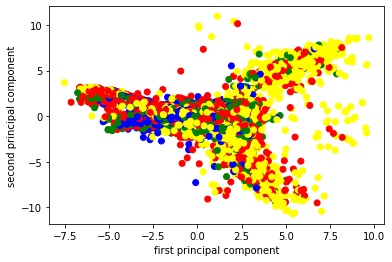

In [39]:
# from above printing result, we know the player column index starts from 16 to 183
# so these columns are the player one-hot features, and we will use PCA to reduce them to 2 dimensions
player_one_hot_features = trainset.iloc[:, 16:184]

# standardize the data
scaler = StandardScaler()
player_one_hot_features = scaler.fit_transform(player_one_hot_features)

# use PCA to reduce the dimension to 2
pca = PCA(n_components=8)
player_one_hot_features = pca.fit_transform(player_one_hot_features)

# visualize the result
# in train_attendance_level, 0: 0-25%, 1: 25-50%, 2: 50-75%, 3: 75-100%
# we use different color to represent different level, 0 is blue, 1 is green, 2 is red, 3 is yellow
colors = ['blue', 'green', 'red', 'yellow']
plt.scatter(player_one_hot_features[:, 0], player_one_hot_features[:, 1], c=train_attendance_level, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()


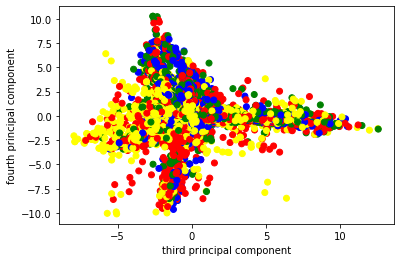

In [41]:
plt.scatter(player_one_hot_features[:, 2], player_one_hot_features[:, 3], c=train_attendance_level, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('third principal component')
plt.ylabel('fourth principal component')
plt.show()

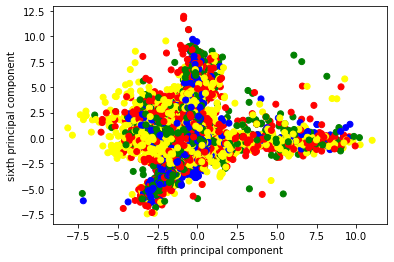

In [42]:
plt.scatter(player_one_hot_features[:, 4], player_one_hot_features[:, 5], c=train_attendance_level, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('fifth principal component')
plt.ylabel('sixth principal component')
plt.show()

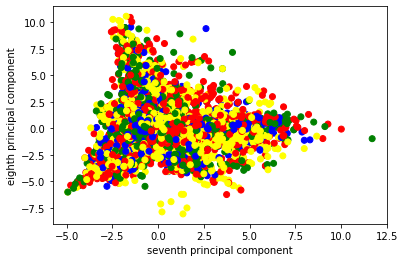

In [43]:
plt.scatter(player_one_hot_features[:, 6], player_one_hot_features[:, 7], c=train_attendance_level, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('seventh principal component')
plt.ylabel('eighth principal component')
plt.show()

From above four pictures, we don't see any obvious clusters. Let's try different dimensionality reduction techniques.